# Seaborn Visualizations

__Kernel Density Function__
A __mathematical technique__ used to get a __smooth probability distribution__ from a __histogram__ of raw data.

<img src='Data/KDE.png' width=500>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__Univariate Visualizations__

We plot __histogram__ using the functions:
- distplot
- rugplot
- kdeplot

In [2]:
height_data = pd.read_csv('Data/height_data.csv')
height_data.head()

,Height
0,190
1,154
2,184
3,163
4,174


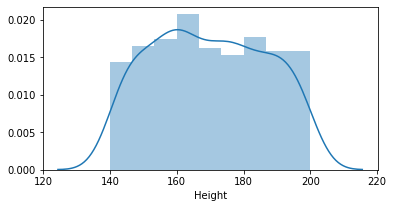

In [3]:
# Default histogram (distribution plot) shows KDE smooth curve
# x-axis 'Bucketed heights'
# y-axis frequency as 'proportions'

plt.figure(figsize=(6, 3))
sns.distplot(height_data['Height'])
plt.show()

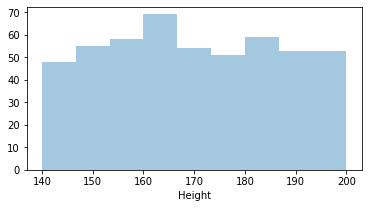

In [4]:
# Histogram alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'

plt.figure(figsize=(6, 3))
sns.distplot(height_data['Height'], kde=False)
plt.show()

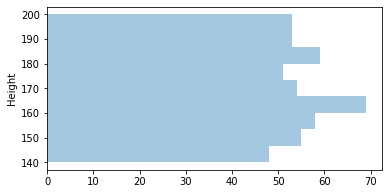

In [5]:
# Histogram alone
# x-axis 'actual frequencies'
# y-axis 'Bucketed heights' (heights are on vertical axis)

plt.figure(figsize=(6, 3))
sns.distplot(height_data['Height'], kde=False, vertical=True)
plt.show()

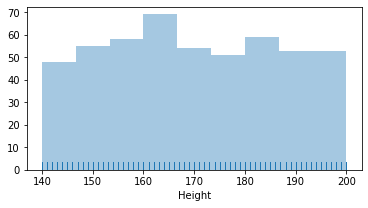

In [6]:
# Histogram alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis

plt.figure(figsize=(6, 3))
sns.distplot(height_data['Height'], kde=False, rug=True)
plt.show()

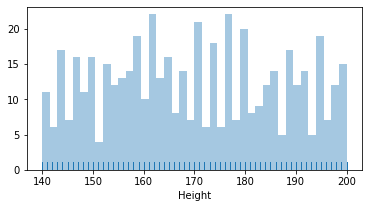

In [7]:
# Histogram alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis
# Heights on x-axis are divided into 'specified Bins'

plt.figure(figsize=(6, 3))
sns.distplot(height_data['Height'], kde=False, rug=True, bins=40)
plt.show()

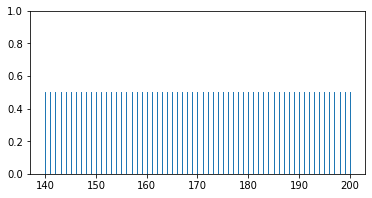

In [8]:
# Rugplot of Heights distribution alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis
# Wants to see only the 'actual ticks'
# Shows that the 'height distribution' is almost 'uniform'

plt.figure(figsize=(6, 3))
sns.rugplot(height_data['Height'], height=0.5)
plt.show()

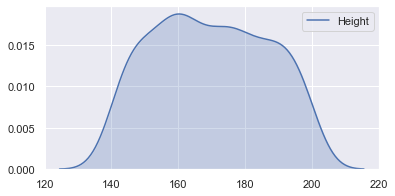

In [9]:
# KDEplot of Heights distribution alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis
# Default shade

plt.figure(figsize=(6, 3))
sns.set(color_codes=True)
sns.kdeplot(height_data['Height'], shade=True)
plt.show()

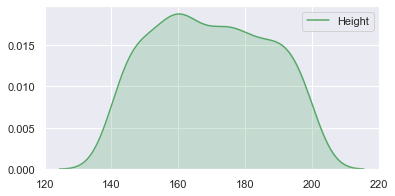

In [10]:
# KDEplot of Heights distribution alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis
# Custom shade

plt.figure(figsize=(6, 3))
sns.set(color_codes=True)
sns.kdeplot(height_data['Height'], shade=True, color='g')
plt.show()

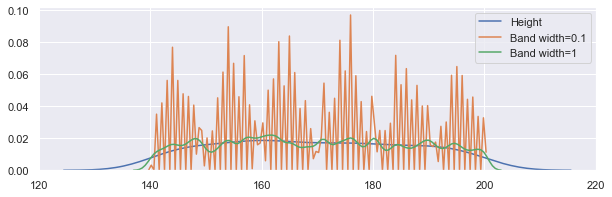

In [11]:
# KDEplot of Heights distribution alone
# x-axis 'Bucketed heights'
# y-axis 'actual frequencies'
# Actual heights are shown as 'ticks' on x-axis
# Custom shade
# Demonstrating same KDEplot with different band widths
#  (if we don't specify the band width seaborn assumes a default value)

plt.figure(figsize=(10, 3))
sns.set(color_codes=True)
sns.kdeplot(height_data['Height']) # default band width
sns.kdeplot(height_data['Height'], bw=0.1, label='Band width=0.1')
sns.kdeplot(height_data['Height'], bw=1, label='Band width=1')
plt.show()

__Bivariate Visualizations__

We use
- scatterplot
- jointplot
- hexbinplot
- kdeplot
- heatmap

In [12]:
# Load dataset from scikit library

tips_data = sns.load_dataset('tips')
tips_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


__Scatter Plots__

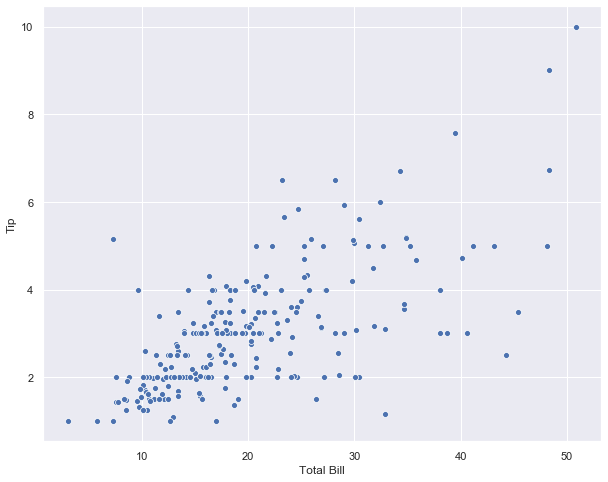

In [13]:
# Default scatter plot

plt.figure(figsize=(10, 8))

sns.scatterplot(x='total_bill', y='tip', data=tips_data)

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:

- __Higher Bill__ leads to __Higher tip__.

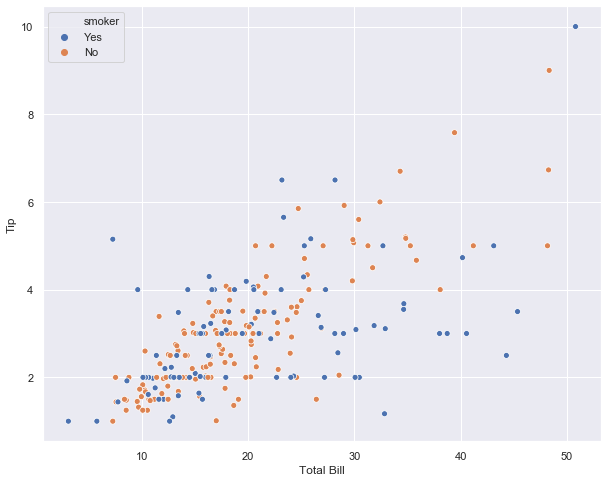

In [14]:
# Scatter plot with 3rd dimension as 'hue'

plt.figure(figsize=(10, 8))

sns.scatterplot(x='total_bill', y='tip', data=tips_data,
                hue='smoker')

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:

- From this distribution, we couldn't draw any additional conclusions other than viewing smokers and non-smokers.

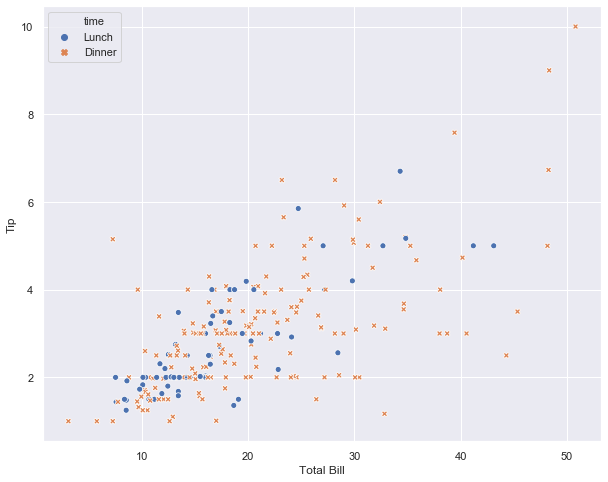

In [15]:
# Scatter plot with 3rd dimension as 'hue' and 'style'

plt.figure(figsize=(10, 8))

sns.scatterplot(x='total_bill', y='tip', data=tips_data, 
                hue='time', style='time')

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:
- Tendency of giving __tips__ at __dinner time__ than at __Lunch time__.
- Noticed by using __hue and style together__, the __pattern__ is __glaringly visible__ than using __just the hue alone__.

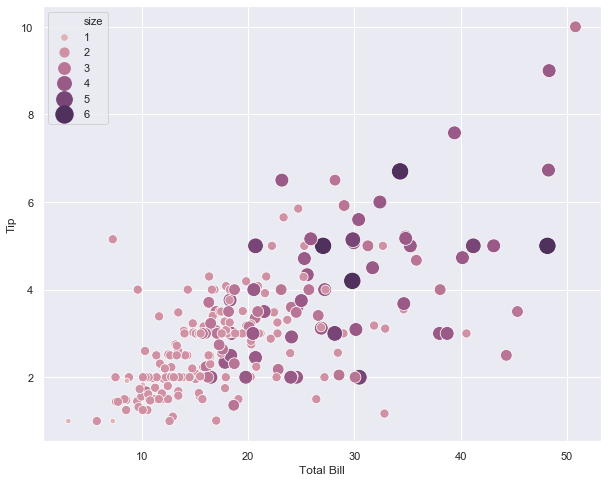

In [16]:
# Scatter plot with 3rd and 4th dimensions as 'hue' and 'size' 
#                      (note size instead of style as above throws more visibility)

plt.figure(figsize=(10, 8))

sns.scatterplot(x='total_bill', y='tip', data=tips_data, 
                hue='size', size='size', sizes=(30, 300), hue_norm=(0, 7), legend='full')

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:
- Customers partying with __more members__ are paying __more tips__.

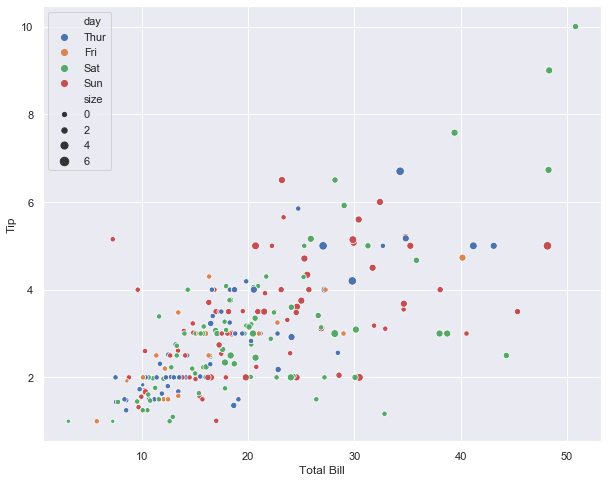

In [17]:
# Scatter plot with 3rd and 4th dimensions as 'hue' and 'size'

plt.figure(figsize=(10, 8))

sns.scatterplot(x='total_bill', y='tip', data=tips_data, 
                hue='day', size='size')

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:
- __Hard to interpret__ as __too many dimensions__

__Hexbin Plots__

__Hexbin plots__ for __Bivariates__ are similar to __Histograms__ for __Univariate__.

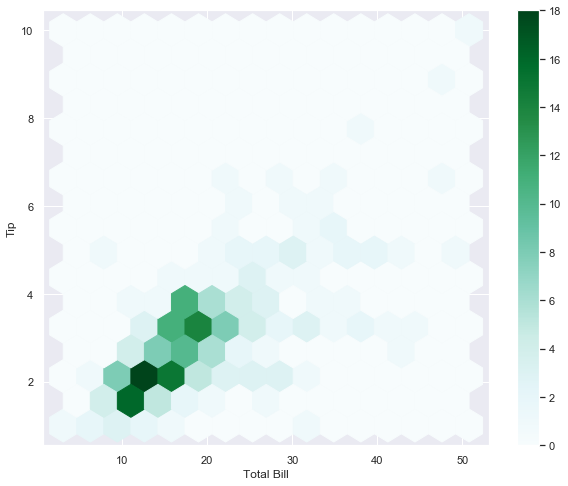

In [18]:
# Hexbin plot with 3rd and 4th dimensions as 'hue' and 'size'
# Color of each hexagon indicates the count(frequency) of observations in each bin

tips_data.plot.hexbin(x='total_bill', y='tip',
                      gridsize=15, figsize=(10, 8), sharex=False)

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

Observations:
- __Majority of bills__ are hovered around __\\$12__ and the __tip__ was around __\\$2__.

__KDE Plots for Bivariate distribution__

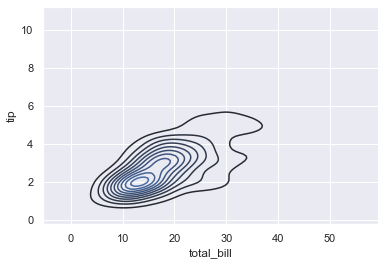

In [19]:
# KDE plot 

sns.kdeplot(tips_data['total_bill'], tips_data['tip'])
plt.show()

__Jointplots__

It is a __Scatter plot__ showing __Bivariate distribution__ & <br/>
__Histograms__ showing __univariate distribution__ of __each variable__.

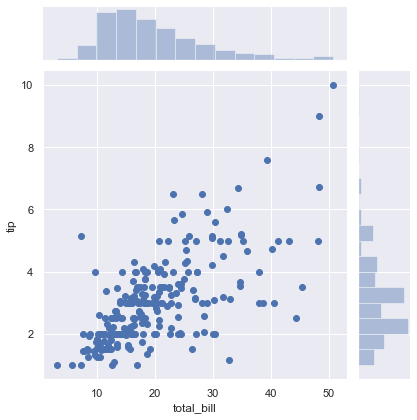

In [20]:
sns.jointplot(x='total_bill', y='tip', data=tips_data)
plt.show()

We can use jointplot to show all kinds of plots we've seen so far

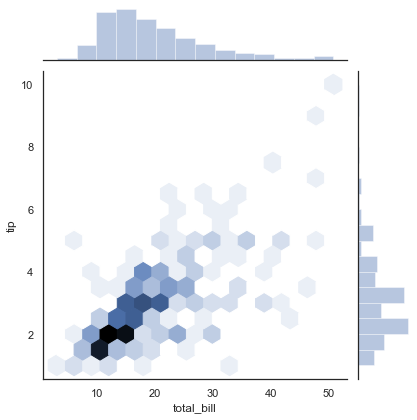

In [21]:
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips_data,
                  kind='hex')
    plt.show()

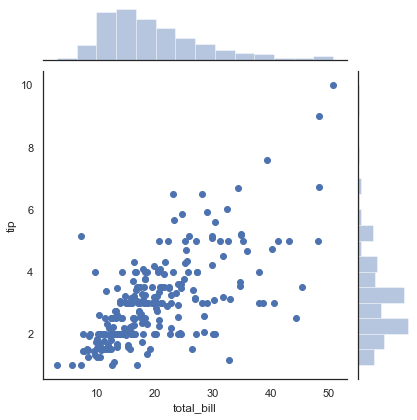

In [22]:
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips_data,
                  kind='scatter')
    plt.show()

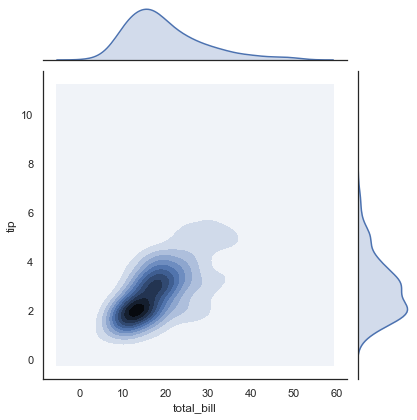

In [23]:
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips_data,
                  kind='kde')
    plt.show()

__Heat Map and Correlation__

In [24]:
tips_corr = tips_data.corr()
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


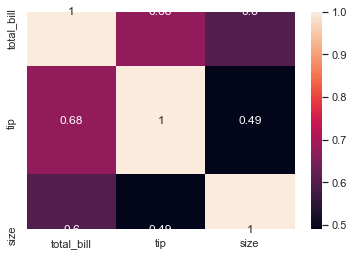

In [25]:
sns.heatmap(tips_corr, annot=True)

__Regression Analysis on Bivariate Data__

Seaborn offers two visualizations for Regression Analysis
- Lmplot (has __fewer__ customizations)
- Regplot (has __more__ customizations)

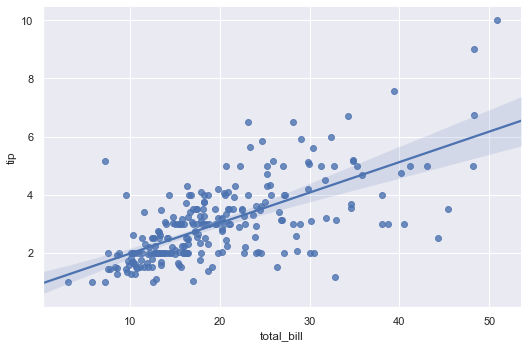

In [26]:
# Aspect ratio is the figure level ratio between length and breadth

sns.lmplot(x='total_bill', y='tip', data=tips_data,
           aspect=1.5)

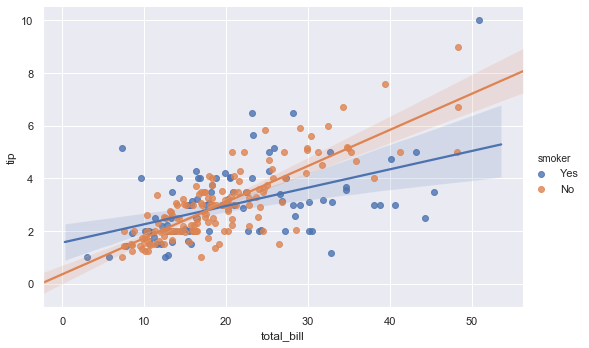

In [27]:
# We can fit multiple lines by addition additional dimension with hue

sns.lmplot(x='total_bill', y='tip', data=tips_data,
           hue='smoker', aspect=1.5)

Observations:
- Perhaps non-smokers tend to tip more (we are not sure)

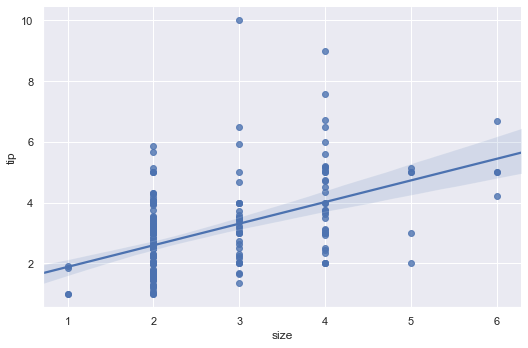

In [28]:
# We can use regression plot on categorical data as well

sns.lmplot(x='size', y='tip', data=tips_data,
           aspect=1.5)

Observations:
- Parties of __size 4__ tend to __tip more__
- We __could not observe__ the data points clearly as they are __cluttered__

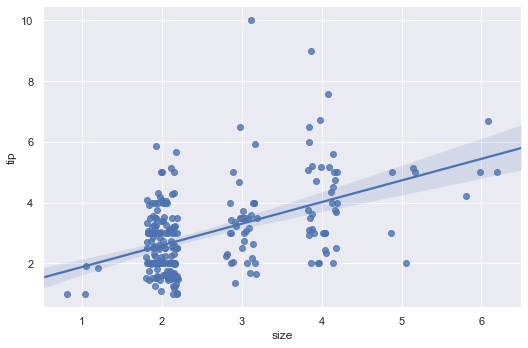

In [29]:
# Let us mention jitter to remove data points clutter

sns.lmplot(x='size', y='tip', data=tips_data,
           x_jitter=0.2, aspect=1.5)

Observations:
- Clearly parties of __size 2 are more__ to visit than other sizes

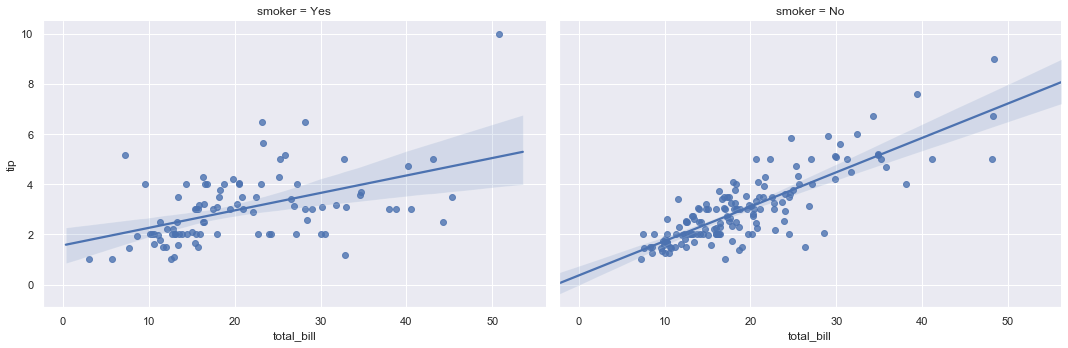

In [30]:
# Let us add 3rd dimension to view the distributions side by side

sns.lmplot(x='total_bill', y='tip', data=tips_data,
           col='smoker', aspect=1.5)

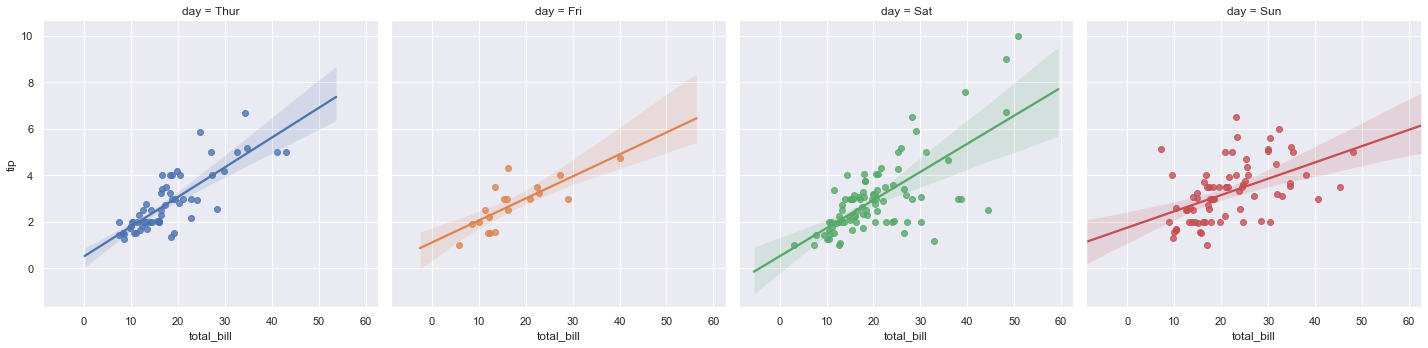

In [31]:
# Let us add 3rd dimension to view the distributions side by side

sns.lmplot(x='total_bill', y='tip', data=tips_data,
           hue='day', col='day')

Observations:
- __Slope__ on Sunday is __lower__ indicating that __Sunday tips__ are __lower__.

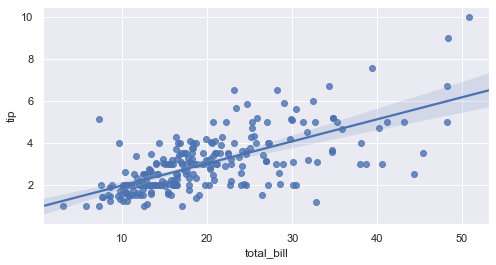

In [32]:
# Default regplot

plt.figure(figsize=(8, 4))
sns.regplot(x='total_bill', y='tip', data=tips_data)

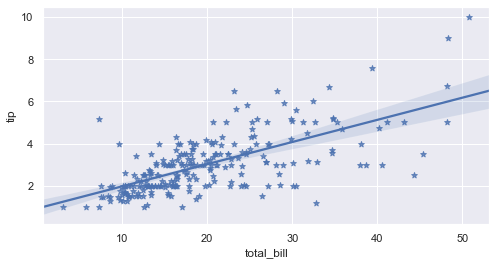

In [33]:
# Flexibility in user inputs (accepts arrays, series, etc.)

plt.figure(figsize=(8, 4))
sns.regplot(tips_data['total_bill'], tips_data['tip'], 
            color='b', marker='*')

In [34]:
# Assuming that tip > (17.5% of bill amount) as 'Big Tip'

tips_data['big_tip'] = (tips_data.tip / tips_data.total_bill) > 0.175
tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size,big_tip
155,29.85,5.14,Female,No,Sun,Dinner,5,False
219,30.14,3.09,Female,Yes,Sat,Dinner,4,False
27,12.69,2.00,Male,No,Sat,Dinner,2,False
17,16.29,3.71,Male,No,Sun,Dinner,3,True
113,23.95,2.55,Male,No,Sun,Dinner,2,False
198,13.00,2.00,Female,Yes,Thur,Lunch,2,False
63,18.29,3.76,Male,Yes,Sat,Dinner,4,True
42,13.94,3.06,Male,No,Sun,Dinner,2,True
114,25.71,4.00,Female,No,Sun,Dinner,3,False
199,13.51,2.00,Male,Yes,Thur,Lunch,2,False


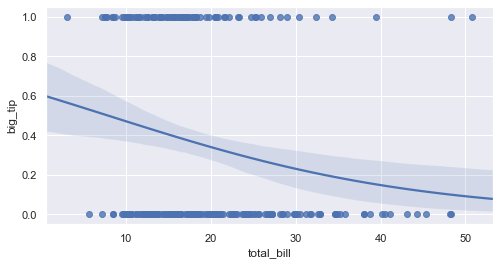

In [42]:
# Fitting Logistic Regression

plt.figure(figsize=(8, 4))
sns.regplot(x='total_bill', y='big_tip', data=tips_data,
            logistic=True, x_jitter=0.02)

__Pairwise Relationships__
- Pairplot (__higher level api__ and __internally__ uses __Pairgrid__)
- Pairgrid (__additional customizations__ possible through this)

In [55]:
admsn_data = pd.read_csv('Data/Admission_Predict.csv')
admsn_data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [56]:
# Let us work with few features and drop the rest for better visualizations
admsn_data.drop(['TOEFL Score', 'SOP', 'LOR', 'University Rating'], axis=1, inplace=True)
admsn_data.head(10)

,GRE Score,CGPA,Research,Chance of Admit
0,337,9.65,1,0.92
1,324,8.87,1,0.76
2,316,8.00,1,0.72
3,322,8.67,1,0.80
4,314,8.21,0,0.65
5,330,9.34,1,0.90
6,321,8.20,1,0.75
7,308,7.90,0,0.68
8,302,8.00,0,0.50
9,323,8.60,0,0.45


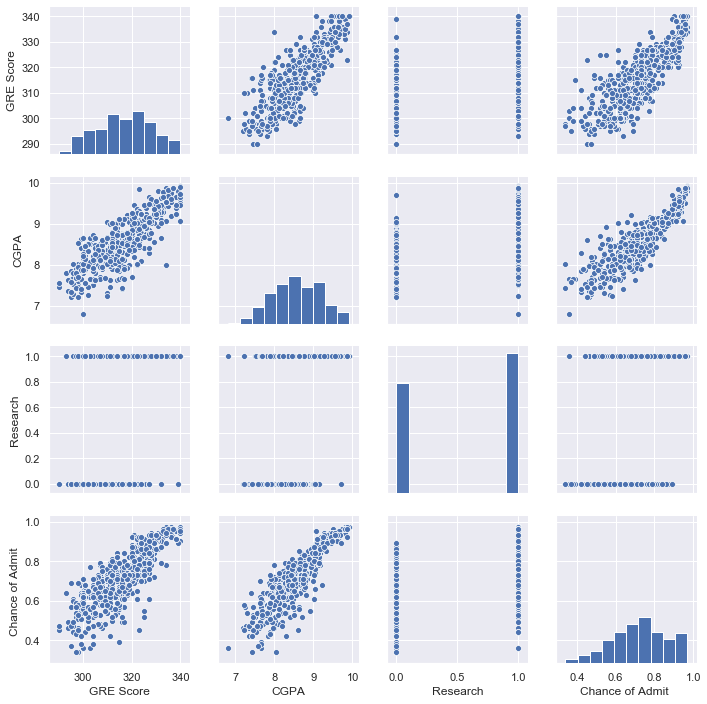

In [57]:
# Visualize a mixture of univariate and bivariate plots
# Diagonal graphs are 'univariate' 'histograms' 
# Non-diagonal graphs are 'bivariate' 'scatter plots'

sns.pairplot(admsn_data, diag_kind='hist')

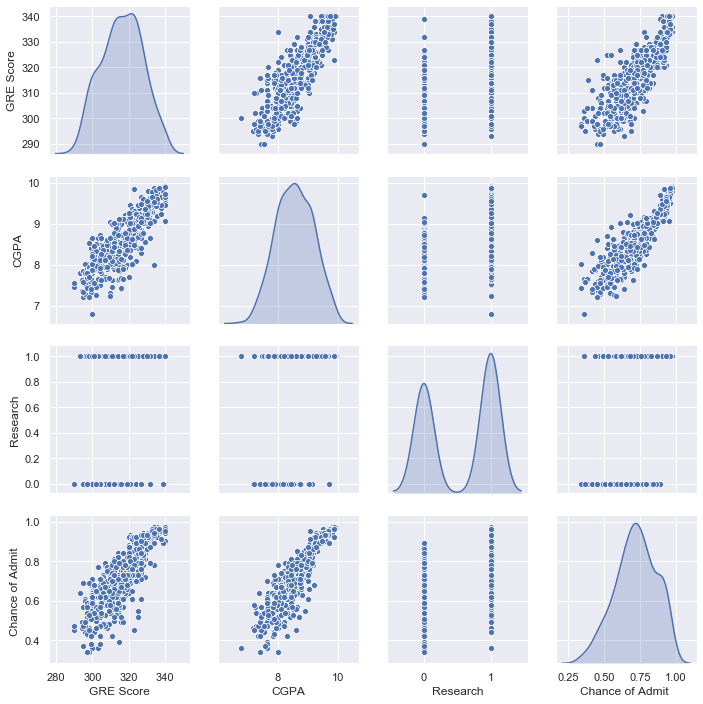

In [58]:
# Customize diagonal graphs to be 'kde' plots

sns.pairplot(admsn_data, diag_kind='kde')

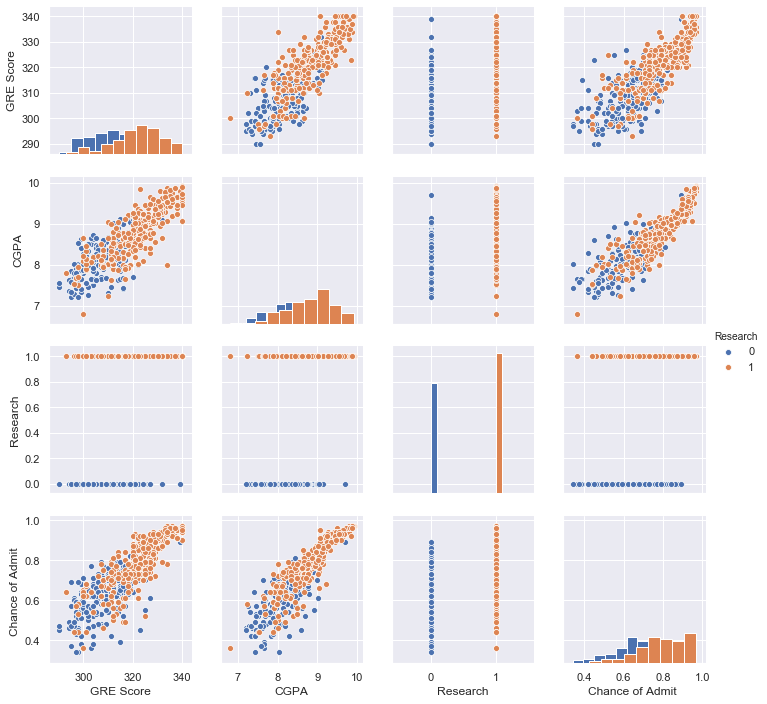

In [59]:
# We can add 3rd dimenstion using 'hue'

sns.pairplot(admsn_data, diag_kind='hist', hue='Research')

In [63]:
iris_data = sns.load_dataset('iris')
iris_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
75,6.6,3.0,4.4,1.4,versicolor
83,6.0,2.7,5.1,1.6,versicolor
32,5.2,4.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
74,6.4,2.9,4.3,1.3,versicolor
132,6.4,2.8,5.6,2.2,virginica
15,5.7,4.4,1.5,0.4,setosa
94,5.6,2.7,4.2,1.3,versicolor
70,5.9,3.2,4.8,1.8,versicolor


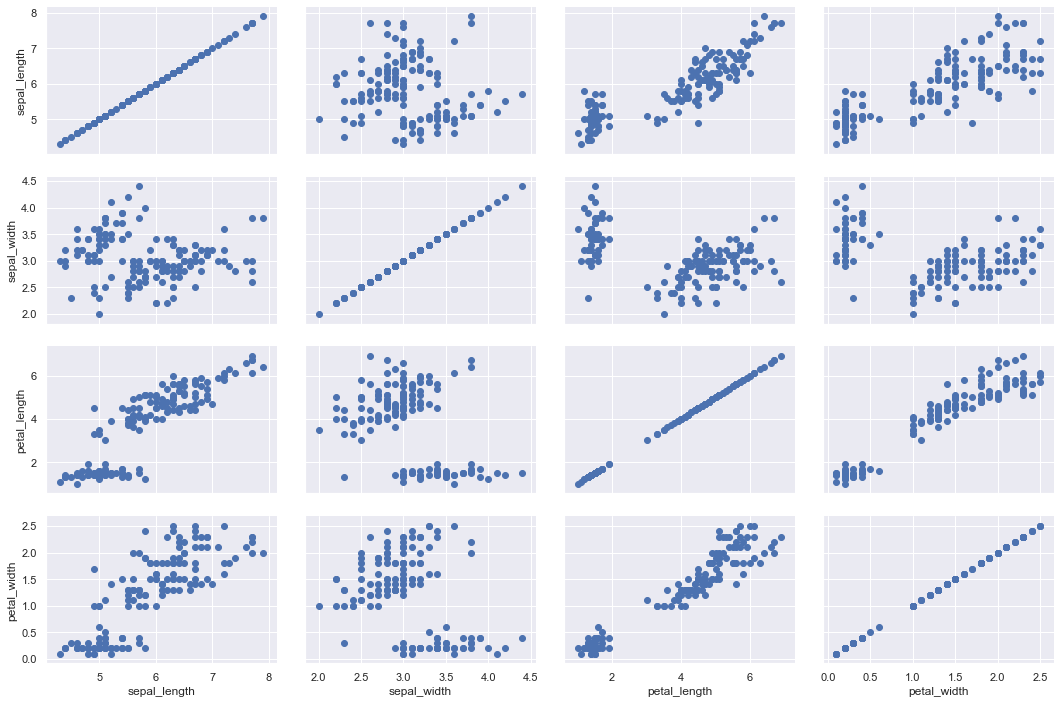

In [64]:
# Both 'Diagonal' and 'non-diagonal' graphs are 'scatter plots'

grid = sns.PairGrid(iris_data, aspect=1.5)
grid.map(plt.scatter)

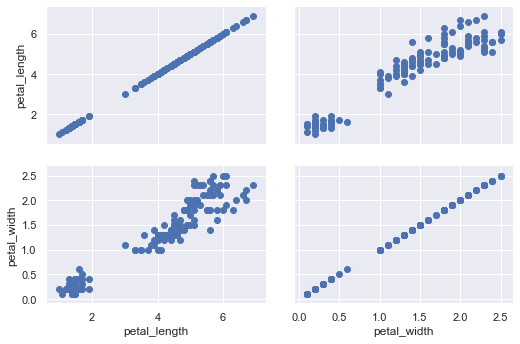

In [65]:
# Let us select few of the features only to be plotted (instead of all)

grid = sns.PairGrid(iris_data, aspect=1.5, vars=['petal_length', 'petal_width'])
grid.map(plt.scatter)

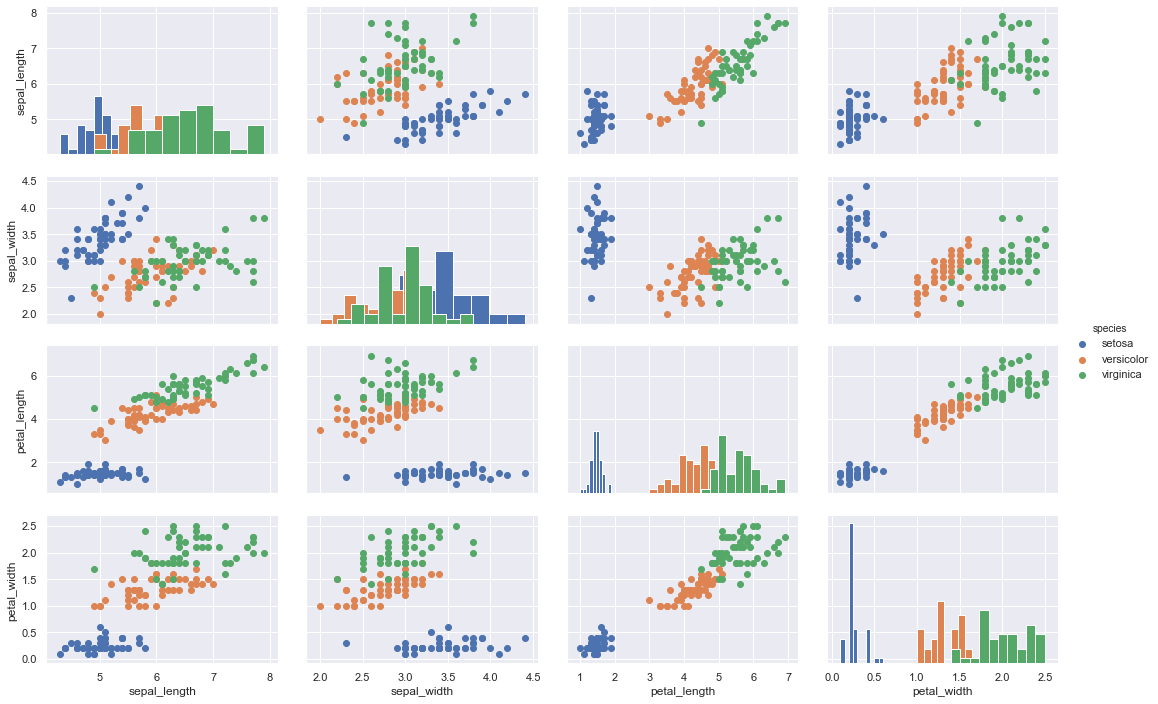

In [67]:
# Add a 3rd dimension using hue
# Specify types of diagonal and non-diagonal plots
# i.e. Diagonal graphs are univariate histograms
#      non-diagonal graphs are bivariate scatter plots

grid = sns.PairGrid(iris_data, aspect=1.5, hue='species')

grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)

grid.add_legend()

__Visualizing Categorical Data__
- Strip plots (scatter plot with overlapps data points)
- Swarm plots (scatter plot no overlap of data points)

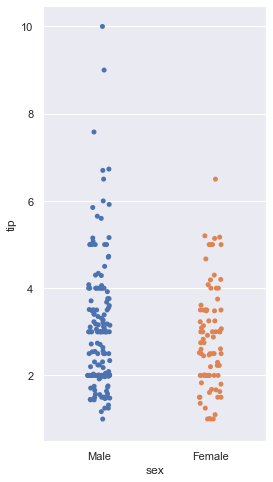

In [70]:
# Study the tip behaviour between male and female
# categorical variable 'sex'

plt.figure(figsize=(4, 8))
sns.stripplot(x='sex', y='tip', data=tips_data)

Observations:
- Among males, we can notice __few males__ give __heavy tips__

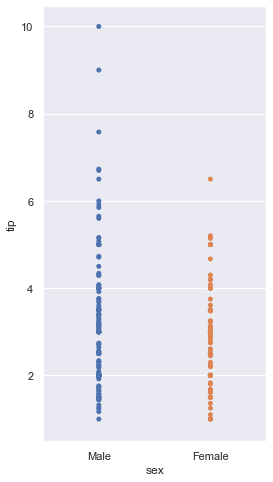

In [73]:
# Let us remove jitter to see all the points in a line
# categorical variable 'sex'

plt.figure(figsize=(4, 8))
sns.stripplot(x='sex', y='tip', data=tips_data,
              jitter=False)

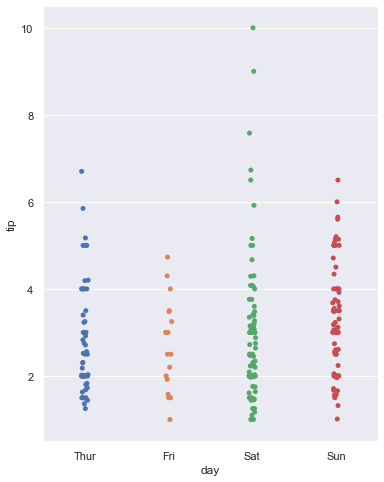

In [77]:
# Let us study the tip behaviour based on 'day'
# categorical variable 'day'

plt.figure(figsize=(6, 8))
sns.stripplot(x='day', y='tip', data=tips_data, jitter=0.04)

Observations:
- __Tips__ on __Saturday__ are __higher__ and have __outliers__ as well(few tend to pay more)

Swarm Plots

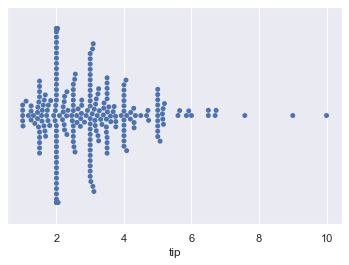

In [79]:
# Default swarm plot shows distribution with 'no overlap' of data points

sns.swarmplot(x='tip', data=tips_data)

Observations:
- __Most of the tips__ are clustered around __\\$2__

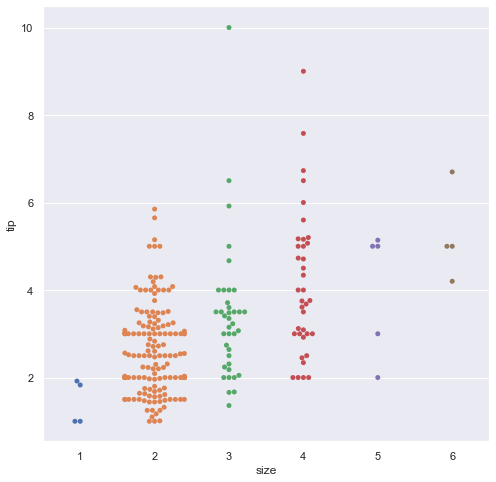

In [84]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x='size', y='tip', data=tips_data)

Observation:
- When __party size__ is just __1__, tips tend to be __low__.
- When __party size__ is about __4__, tips tend to be __more__.

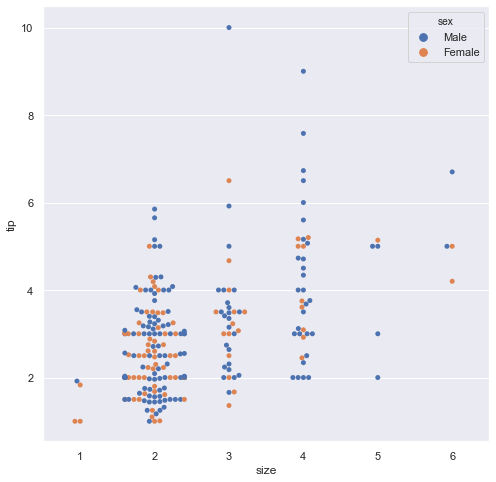

In [86]:
# Let us add 3rd dimension to study tip behaviour between male and females

plt.figure(figsize=(8, 8))
sns.swarmplot(x='size', y='tip', hue='sex', data=tips_data)

Observations:
- For a party of __size 4__, __higher tips__ are by __males__.

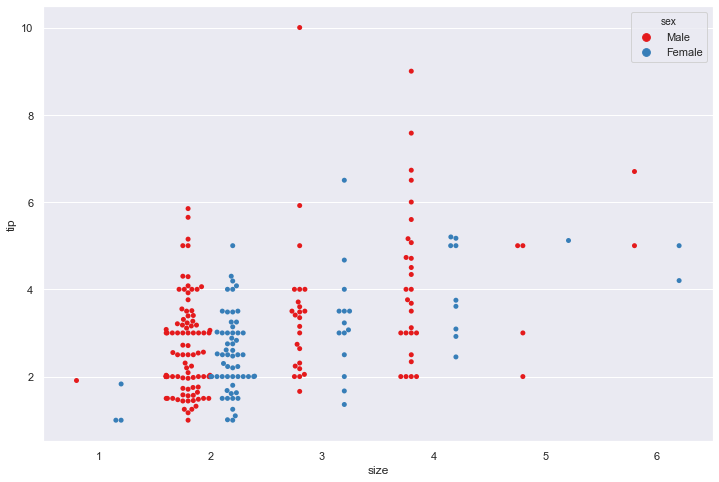

In [90]:
# palette is color set
# dodge separates data points governed by 'hue'
# i.e. male and females are shown side by side instead of showing them linearly

plt.figure(figsize=(12, 8))
sns.swarmplot(x='size', y='tip', hue='sex', data=tips_data,
              palette='Set1', dodge=True)

__Visualizing Data Statistically__
- Box plots (box has no significance other than boundaries)
- Violin plots (same as box plot but replaces box with kerned density areas for additional idea on data distribution)

In [96]:
admsn_data = pd.read_csv('Data/Admission_Predict.csv')

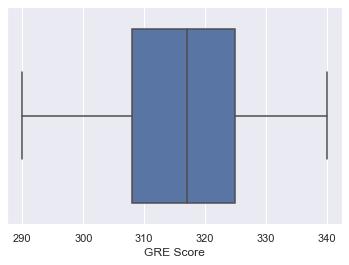

In [97]:
# You can notice the statistical distribution
# GRE Score is distributed between 290 and 340 with a median around 318

sns.boxplot(x='GRE Score', data=admsn_data)

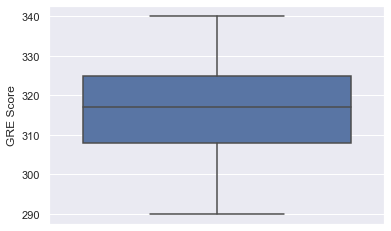

In [98]:
# Transform orientation

sns.boxplot(x='GRE Score', data=admsn_data,
            orient='v')

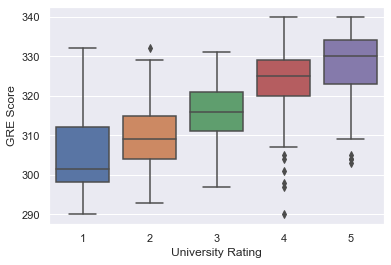

In [99]:
# Let us view the distribution of 'GRE Score' against 'categorical' variable, 'University Rating'

sns.boxplot(x='University Rating', y='GRE Score', data=admsn_data)

Observations:
- For __higher rated universities__ the __GRE Score__ would be on __higher__ level.

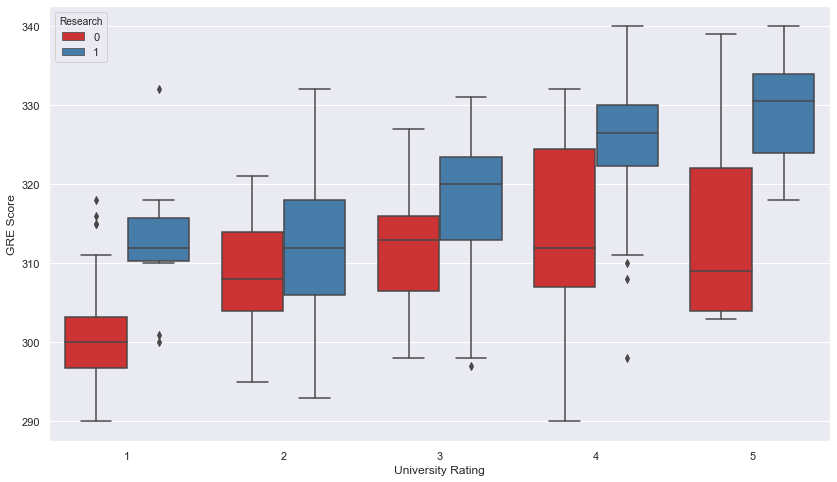

In [103]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='University Rating', y='GRE Score', hue='Research', data=admsn_data,
            palette='Set1')

Observations:
- Students with __higher GRE Scores__ opt for __Research__ in any university

Violin plots

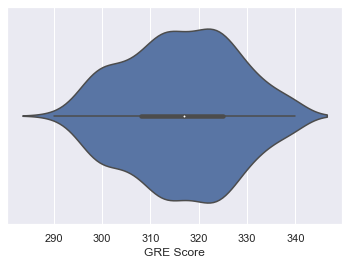

In [104]:
# Additional info we gain over 'boxplot' is 'how data is distributed'

sns.violinplot(x='GRE Score', data=admsn_data)

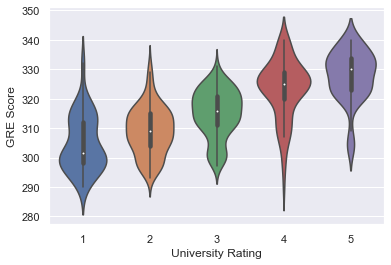

In [105]:
sns.violinplot(x='University Rating', y='GRE Score', data=admsn_data)

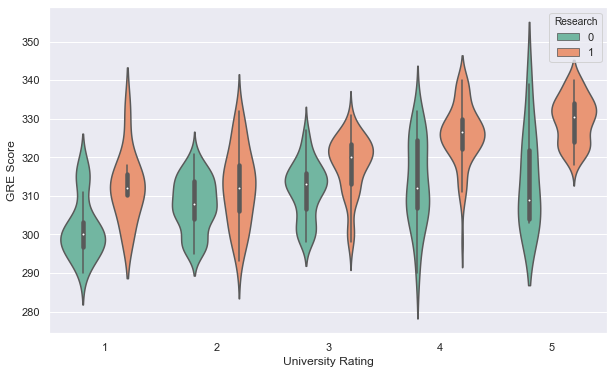

In [107]:
# Add a 3rd dimension using 'hue'

plt.figure(figsize=(10, 6))
sns.violinplot(x='University Rating', y='GRE Score', hue='Research', data=admsn_data, palette='Set2')

In [108]:
# Let us identify 'Distinction' students whose CGPA score > 8.5

admsn_data['First Class'] = admsn_data['CGPA'] > 8.5
admsn_data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,First Class
260,327,108,5,5.0,3.5,9.13,1,0.87,True
468,323,110,4,4.0,5.0,8.88,1,0.81,True
264,325,110,2,3.0,2.5,8.76,1,0.75,True
334,312,107,4,4.5,4.0,8.65,1,0.73,True
140,329,110,2,4.0,3.0,9.15,1,0.84,True
331,311,105,2,3.0,2.0,8.12,1,0.73,False
5,330,115,5,4.5,3.0,9.34,1,0.90,True
428,316,103,2,2.0,4.5,8.74,0,0.69,True
252,318,100,2,2.5,3.5,8.54,1,0.71,True
16,317,107,3,4.0,3.0,8.70,0,0.66,True


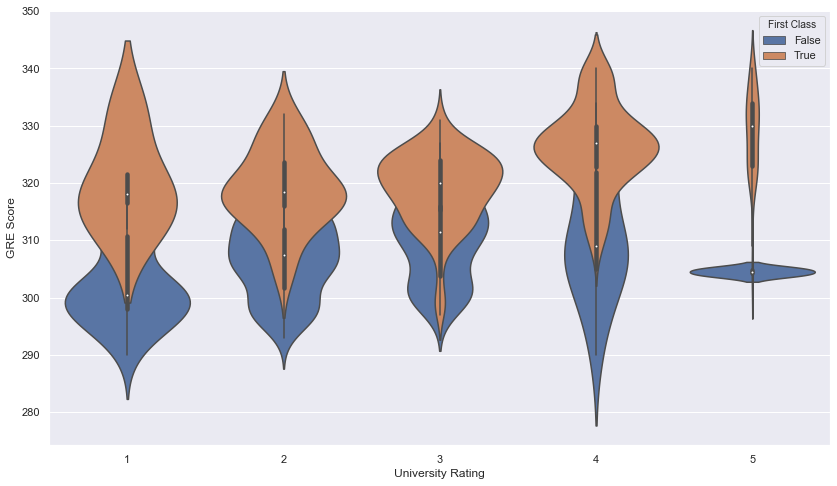

In [113]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='University Rating', y='GRE Score', hue='First Class', data=admsn_data,
               dodge=False)

Observations:
- Students with __high GRE Scores__ will __opt__ to do __Research__

In Seaborn, multiple visualizations in the same chart are possible.

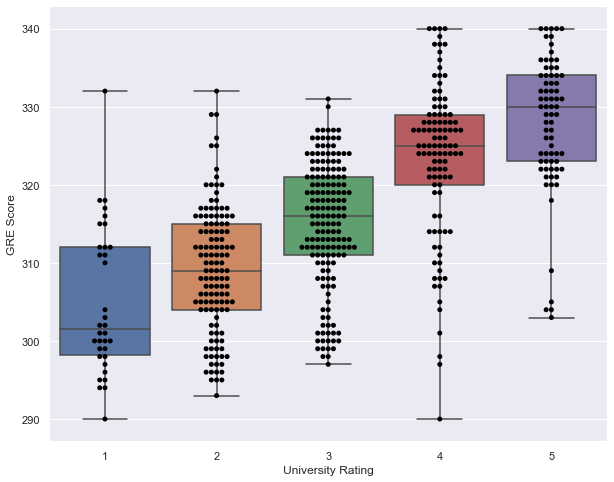

In [116]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='University Rating', y='GRE Score', data=admsn_data, whis=np.inf)
sns.swarmplot(x='University Rating', y='GRE Score', data=admsn_data, color='black')

__Visualizing Categorical Data__
- Bar plots
- Point plots
- Cat plots

Bar Plots

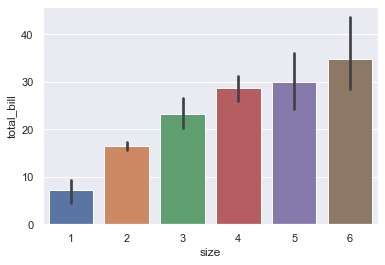

In [117]:
# Bar plot shows 'average bill amount' for each 'party size'
# Black vertical lines are 'error estimates' 
# Black vertical lines are 'uncertainity' around the 'estimates'

sns.barplot(x='size', y='total_bill', data=tips_data)

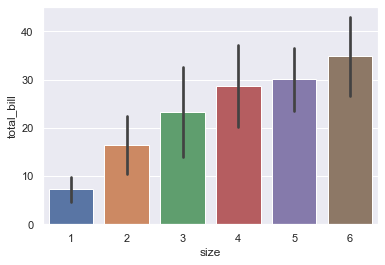

In [121]:
# Black vertical lines indicate 'error estimates'
# We can customize it to represent 'standard deviation'

sns.barplot(x='size', y='total_bill', data=tips_data, ci='sd')

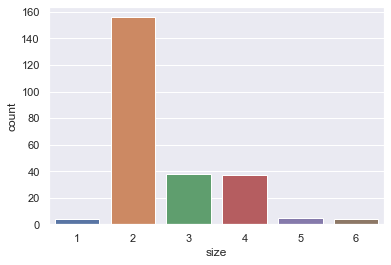

In [119]:
# Count plot showing the 'no. of parties' of 'each size'

sns.countplot(x='size', data=tips_data)

Observations:
- We notice that __parties of size 2__ are __highest diners__ among others
- __Most__ of the __diners__ are __couples__

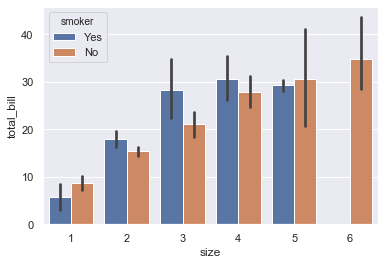

In [120]:
# Add 3rd dimension to study the pattern by 'smoker'

sns.barplot(x='size', y='total_bill', hue='smoker', data=tips_data)

Observations:
- In general, __smokers__ make __large bills__

In [122]:
# Let us examine partying people to inspect for 'couples' (assumption: only 2 attendies means couple)

tips_data['couple'] = tips_data['size'] == 2
tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size,big_tip,couple
28,21.70,4.30,Male,No,Sat,Dinner,2,True,True
232,11.61,3.39,Male,No,Sat,Dinner,2,True,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False,True
140,17.47,3.50,Female,No,Thur,Lunch,2,True,True
12,15.42,1.57,Male,No,Sun,Dinner,2,False,True
7,26.88,3.12,Male,No,Sun,Dinner,4,False,False
25,17.81,2.34,Male,No,Sat,Dinner,4,False,False
29,19.65,3.00,Female,No,Sat,Dinner,2,False,True
68,20.23,2.01,Male,No,Sat,Dinner,2,False,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,False,False


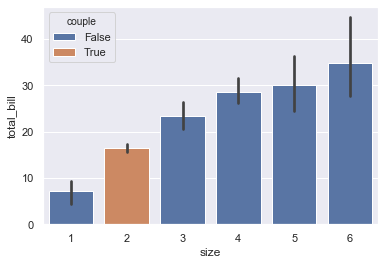

In [124]:
# Helpful trick to highlight special category

sns.barplot(x='size', y='total_bill', hue='couple', data=tips_data, 
            dodge=False)

Point plots

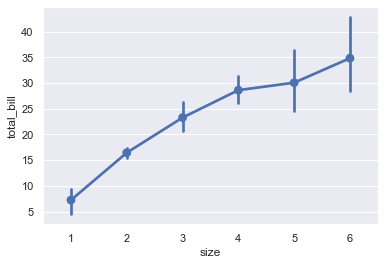

In [125]:
sns.pointplot(x='size', y='total_bill', data=tips_data)

Observations:
- As the __size of party__ goes __up__ the total __bill__ goes __higher__

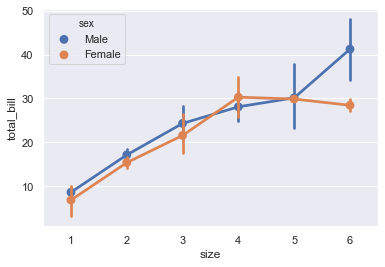

In [126]:
sns.pointplot(x='size', y='total_bill', hue='sex', data=tips_data)

Observations:
- Tip behaviour between __Male and Female__ goes in __parallel__ starting with __sizes 1 through 5__ but __Males__ give more __tip__ in partying of __size 6__.

Cat plots

It is a generic function for categorcal plots.

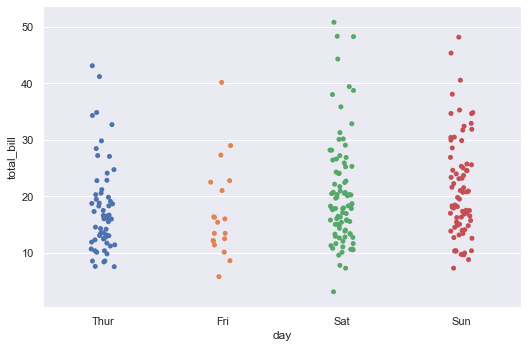

In [128]:
# By default catplot graphs category as a strip plot

sns.catplot(x='day', y='total_bill', data=tips_data, aspect=1.5)

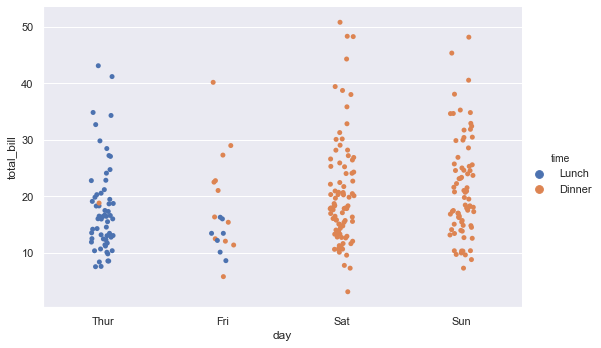

In [130]:
# By default catplot graphs category as a strip plot
# Add a 3rd dimension 'hue'

sns.catplot(x='day', y='total_bill', hue='time', data=tips_data, aspect=1.5)

Observations:
- __Thursday__ being a __week day__, we notice __more Lunches than Dinners__.
- __Saturday and Sunday__ being __weekends__, we notice __more Dinners__.

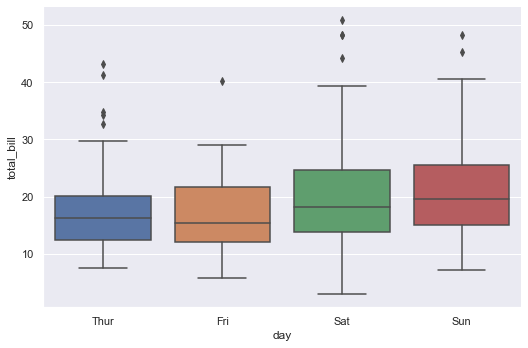

In [127]:
# Graph 'categorical' data 'day' as a boxplot

sns.catplot(x='day', y='total_bill', kind='box', data=tips_data, aspect=1.5)

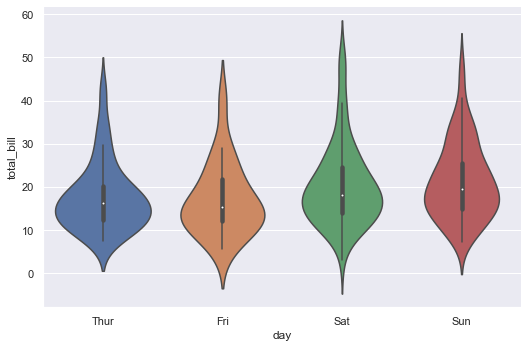

In [131]:
# Graph 'categorical' data 'day' as a boxplot

sns.catplot(x='day', y='total_bill', kind='violin', data=tips_data, aspect=1.5)